In [18]:
%matplotlib inline

import numpy as np
import pandas as pd
import joblib
import xgboost
from pylab import plot, boxplot


In [6]:
# for original data:
# load original features
trainDataFrame = pd.read_csv('./data/train.csv')

# remove constant columns
colsToRemove1 = []
for col in trainDataFrame.columns:
    if trainDataFrame[col].std() == 0:
        colsToRemove1.append(col)

trainDataFrame.drop(colsToRemove1, axis=1, inplace=True)

# remove duplicate columns
colsToRemove2 = []
columns = trainDataFrame.columns
for i in range(len(columns)-1):
    v = trainDataFrame[columns[i]].values
    for j in range(i+1,len(columns)):
        if np.array_equal(v,trainDataFrame[columns[j]].values):
            colsToRemove2.append(columns[j])

trainDataFrame.drop(colsToRemove2, axis=1, inplace=True)
trainDataFrame.drop(['ID'], axis=1, inplace=True)

trainLabels = trainDataFrame['TARGET']
trainFeatures = trainDataFrame.drop(['TARGET'], axis=1)

In [8]:
print colsToRemove1
print colsToRemove2

['ind_var2_0', 'ind_var2', 'ind_var27_0', 'ind_var28_0', 'ind_var28', 'ind_var27', 'ind_var41', 'ind_var46_0', 'ind_var46', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27', 'num_var41', 'num_var46_0', 'num_var46', 'saldo_var28', 'saldo_var27', 'saldo_var41', 'saldo_var46', 'imp_amort_var18_hace3', 'imp_amort_var34_hace3', 'imp_reemb_var13_hace3', 'imp_reemb_var33_hace3', 'imp_trasp_var17_out_hace3', 'imp_trasp_var33_out_hace3', 'num_var2_0_ult1', 'num_var2_ult1', 'num_reemb_var13_hace3', 'num_reemb_var33_hace3', 'num_trasp_var17_out_hace3', 'num_trasp_var33_out_hace3', 'saldo_var2_ult1', 'saldo_medio_var13_medio_hace3']
['ind_var29_0', 'ind_var29', 'ind_var13_medio', 'ind_var18', 'ind_var26', 'ind_var25', 'ind_var32', 'ind_var34', 'ind_var37', 'ind_var39', 'num_var29_0', 'num_var29', 'num_var13_medio', 'num_var18', 'num_var26', 'num_var25', 'num_var32', 'num_var34', 'num_var37', 'num_var39', 'saldo_var29', 'saldo_medio_var13_medio_ult1', 'delta_num_reemb_var13_1y3', 'delta_num_r

In [21]:
trainDataFrame.describe()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000
mean,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,3.160715,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,117235.809430,0.039569
std,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,95.268204,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,182664.598503,0.194945
min,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5163.750000,0.000000
25%,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67870.612500,0.000000
50%,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,106409.160000,0.000000
75%,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,118756.252500,0.000000
max,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,8237.820000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,22034738.760000,1.000000


In [14]:
trainDataFrame.saldo_var33.describe()

count     76020.000000
mean         12.532333
std         797.839557
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      142078.800000
Name: saldo_var33, dtype: float64

(array([  7.59980000e+04,   1.10000000e+01,   3.00000000e+00,
          5.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([      0.  ,   14207.88,   28415.76,   42623.64,   56831.52,
          71039.4 ,   85247.28,   99455.16,  113663.04,  127870.92,
         142078.8 ]),
 <a list of 10 Patch objects>)

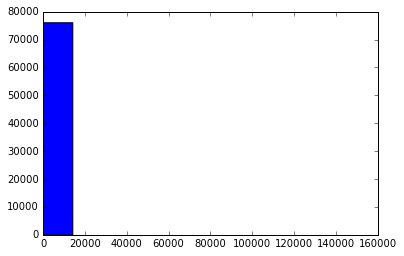

In [13]:
plt.hist(trainDataFrame.saldo_var33)

{'boxes': [<matplotlib.lines.Line2D at 0x10923a310>],
 'caps': [<matplotlib.lines.Line2D at 0x109245190>,
 'fliers': [<matplotlib.lines.Line2D at 0x109251490>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x109245e10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x10923a450>,
  <matplotlib.lines.Line2D at 0x10923ab10>]}

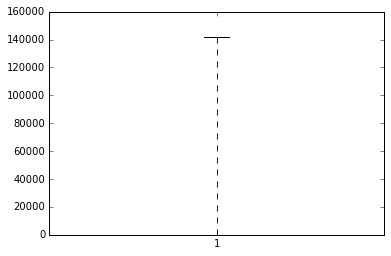

In [20]:
boxplot(trainDataFrame.saldo_var33)